Hahua Mykyta DA-22 Machine Learning Lab#1

lets download all files from google drive

In [128]:
import requests
import csv
import numpy as np
import matplotlib.pyplot as plt

URL = 'https://drive.google.com/uc?export=download&id='
TRAIN_ID = '1ZJ7USoXN5Iijv_j-o8igJKD6w5jr5QPF'
TEST_ID = '1Dtf7FRjjhAGEikPFYYXmBBEdFFFWa-kK'

def direct_download_data(file_id):
    session = requests.Session()
    response = session.get(URL + file_id)
    reader = csv.reader(response.text.splitlines())
    return [row[1:] for row in reader]

train_data = direct_download_data(TRAIN_ID)
test_data = direct_download_data(TEST_ID)

here is implementation of the main logic of gradient descent

In linear regression, the prediction is made using the equation:

y_pred = weight * x + bias,

where y_pred is the predicted output, weight is the model's weight, x is the input feature, and bias is the model's bias term.

In [129]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
    
def get_linear_regression(bias, weight, x):
    return weight * x + bias

def gradient_descent(x, y, learning_rate=0.01, epochs=8000):
    weights = 0
    bias = 0

    for epoch in range(epochs):
        y_pred = get_linear_regression(bias, weights, x)
        loss = mean_squared_error(y, y_pred)
        dw = -2 * np.dot(x.T, (y - y_pred)) / len(x)
        db = -2 * np.sum(y - y_pred) / len(x)
        weights -= learning_rate * dw
        bias -= learning_rate * db
        print(f"Epoch {epoch}, Loss: {loss}, Weights: {weights}, Bias: {bias}")
    return weights, bias


here is functions for visualizing tables and graphic with linear regression

In [130]:
def print_table(data, title):
    print(f"{title} table:")
    for row in data:
        print(" | ".join(row))

def visualize_table(table_to_visualize):
    x = np.array([float(row[0]) for row in table_to_visualize[1:]])
    y = np.array([float(row[1]) for row in table_to_visualize[1:]])
    plt.plot(x, y, marker='.', linestyle=' ')
    plt.grid(True)
    plt.title('Data Visualization')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def visualize_tables(train_table, test_table):
    x_train = np.array([float(row[0]) for row in train_table[1:]])
    y_train = np.array([float(row[1]) for row in train_table[1:]])
    x_test = np.array([float(row[0]) for row in test_table[1:]])
    y_test = np.array([float(row[1]) for row in test_table[1:]])

    plt.plot(x_train, y_train, marker='.', linestyle=' ', color='blue', label='Train Data')
    plt.plot(x_test, y_test, marker='.', linestyle=' ', color='green', label='Test Data')

    weights, bias = gradient_descent(x_train, y_train)

    min_x = min(min(x_train), min(x_test))
    max_x = max(max(x_train), max(x_test))
    min_y = min(min(y_train), min(y_test), bias + weights * min_x)
    max_y = max(max(y_train), max(y_test), bias + weights * max_x)

    x_ticks = np.linspace(min_x, max_x, 5)
    y_ticks = np.linspace(min_y, max_y, 5)
    y_ticks = y_ticks.flatten()
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    plt.plot(x_train, y_train, marker='o', linestyle='None', label='Training Data')
    plt.plot(x_test, y_test, marker='o', linestyle='None', label='Testing Data')

    x_line = np.linspace(min_x, max_x, 100)
    y_line = weights * x_line + bias
    plt.plot(x_line, y_line, color='red', label='Regression Line')

    plt.grid(True)

    plt.title('Train and Test Data Visualization')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.show()

lets see train table

In [131]:
print_table(train_data, "Train")

Train table:
x | y
0.0 | 20.14901424590337
0.010101010101010102 | 19.978722729850666
0.020202020202020204 | 20.234710601834248
0.030303030303030304 | 20.51751501752847
0.04040404040404041 | 20.010562068391078
0.05050505050505051 | 20.030769013925347
0.06060606060606061 | 20.59497596586434
0.07070707070707072 | 20.371644560160014
0.08080808080808081 | 20.020773845835677
0.09090909090909091 | 20.344586194893974
0.10101010101010102 | 20.062994894176462
0.11111111111111112 | 20.082503296151145
0.12121212121212122 | 20.315012923894052
0.13131313131313133 | 19.688642189228922
0.14141414141414144 | 19.765352933074375
0.15151515151515152 | 20.13434404425801
0.16161616161616163 | 20.019382987131994
0.17171717171717174 | 20.437708543212924
0.18181818181818182 | 20.09122914098
0.19191919191919193 | 19.960147273437798
0.20202020202020204 | 20.84373503471687
0.21212121212121213 | 20.356509534096464
0.22222222222222224 | 20.46470290585082
0.23232323232323235 | 20.037222008782425
0.24242424242424243 

lets see test table

In [132]:
print_table(test_data, "Test")

Test table:
x | y
0.6060606060606061 | 21.068368940767623
0.6161616161616162 | 21.176625539324085
0.6262626262626263 | 20.920624760323445
0.6363636363636365 | 20.91386528550307
0.6464646464646465 | 21.536687039647553
0.6565656565656566 | 21.720003321702563
0.6666666666666667 | 21.31173029685923
0.6767676767676768 | 21.65459522290296
0.686868686868687 | 21.482228181251664
0.696969696969697 | 21.20040346755786
0.7070707070707072 | 21.52256009579394
0.7171717171717172 | 21.895754404283228
0.7272727272727273 | 21.443797642812466
0.7373737373737375 | 21.944140571491676
0.7474747474747475 | 20.70902596372257
0.7575757575757577 | 21.761722266464083
0.7676767676767677 | 21.561467655824988
0.7777777777777778 | 21.4658533504158
0.787878787878788 | 21.603285808718226
0.797979797979798 | 20.999688921579327
0.8080808080808082 | 21.550260049810362
0.8181818181818182 | 21.74349740781716
0.8282828282828284 | 22.099933869988114
0.8383838383838385 | 21.521286611285586
0.8484848484848485 | 21.45442161610

lets visualize training data on the graphic

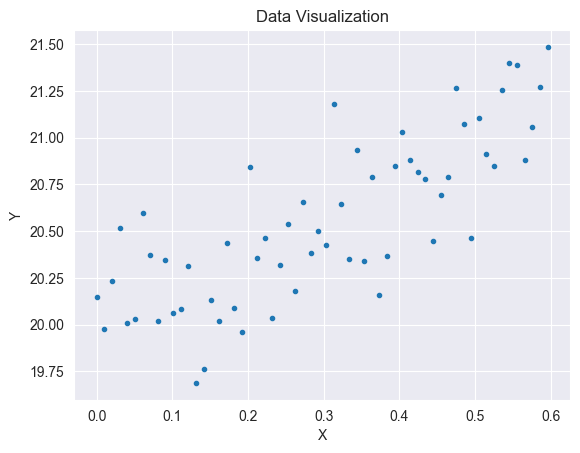

In [133]:
visualize_table(train_data)

next step we will call gradient_descent function and see loss, weight and bias for every epoch and finally we will see graphic with result line

Epoch 0, Loss: 422.47740188480714, Weights: 0.1236781346536487, Bias: 0.41099126382076906
Epoch 1, Loss: 404.25742497676725, Weights: 0.2446116024027861, Bias: 0.8130256306535505
Epoch 2, Loss: 386.82412434421605, Weights: 0.36286033659171624, Bias: 1.2062985955438985
Epoch 3, Loss: 370.1435331252907, Weights: 0.47848296238132854, Bias: 1.59100138645794
Epoch 4, Loss: 354.18315106962933, Weights: 0.5915368253029153, Bias: 1.967321057420207
Epoch 5, Loss: 338.911881213436, Weights: 0.7020780191887424, Bias: 2.3354405796185445
Epoch 6, Loss: 324.29996928877193, Weights: 0.8101614134929778, Bias: 2.6955389305204642
Epoch 7, Loss: 310.3189457490135, Weights: 0.9158406800162846, Bias: 3.0477911810443508
Epoch 8, Loss: 296.9415702975205, Weights: 1.019168319047094, Bias: 3.392368580827974
Epoch 9, Loss: 284.1417788114293, Weights: 1.1201956849322912, Bias: 3.7294386416358423
Epoch 10, Loss: 271.89463255715407, Weights: 1.2189730110897679, Bias: 4.059165218946015
Epoch 11, Loss: 260.176269598

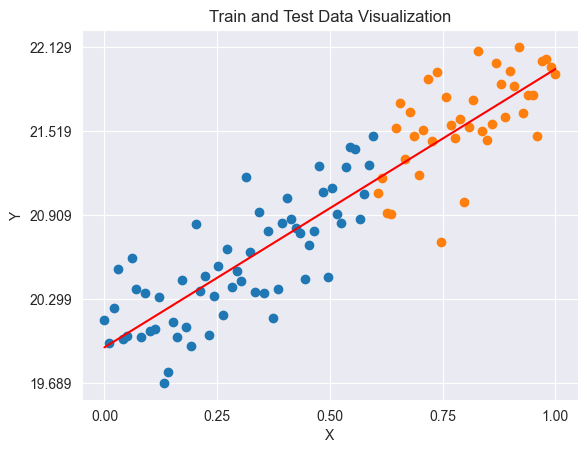

In [134]:
x_train = np.array([float(row[0]) for row in train_data[1:]], dtype=float)
y_train = np.array([float(row[1]) for row in train_data[1:]], dtype=float)
weights, bias = gradient_descent(x_train, y_train)

visualize_tables(train_data, test_data)

in the end we check Test Data Loss

In [135]:
test_data_numeric = np.array(test_data[1:], dtype=float)

x_test = test_data_numeric[:, 0]
y_test = test_data_numeric[:, 1] 

predicted_test_y = get_linear_regression(bias, weights, x_test)
test_loss = mean_squared_error(y_test, predicted_test_y)
print(f"Test data loss = {test_loss}")


Test data loss = 0.07412164799460672
